In [59]:
import numpy as np
import matplotlib.pyplot as plt

In [60]:
def trapezoid_method(a, b, N, f):
    xi = a
    xj = a + (b - a) / N
    h = (b - a) / N
    I = 0
    for i in range(N):
        I += (f(xi) + f(xj)) * h / 2
        xi += h
        xj += h
    return I

In [61]:
def simpsons_method(a, b, N, f):
    xi = a
    xj = a + (b - a) / N
    h = (b - a) / N
    I = 0
    for i in range(N):
        I += (f(xi) + 4 * f((xj + xi) / 2) + f(xj)) * h / 6
        xi += h
        xj += h
    return I

In [62]:
def J_simpson(x, m):
  result = simpsons_method(0, np.pi, 2**7, lambda t: np.cos(m * t - x * np.sin(t)))
  return (1 / np.pi) * result

def dJ_simpson(x, m, h=1e-6):
  return (J_simpson(x + h, m) - J_simpson(x - h, m)) / (2 * h)

In [63]:
def J_trapezoid(x, m):
  result = trapezoid_method(0, np.pi, 2**7, lambda t: np.cos(m * t - x * np.sin(t)))
  return (1 / np.pi) * result

def dJ_trapezoid(x, m, h=1e-6):
  return (J_trapezoid(x + h, m) - J_trapezoid(x - h, m)) / (2 * h)

In [64]:
interval = np.linspace(0, 2*np.pi, 500)
epsilon = np.array([1e-10 for i in interval])
sum_simpson = np.array([J_simpson(i,1) + dJ_simpson(i,0) for i in interval])
sum_trapezoid =np.array([J_trapezoid(i,1) + dJ_trapezoid(i,0) for i in interval])

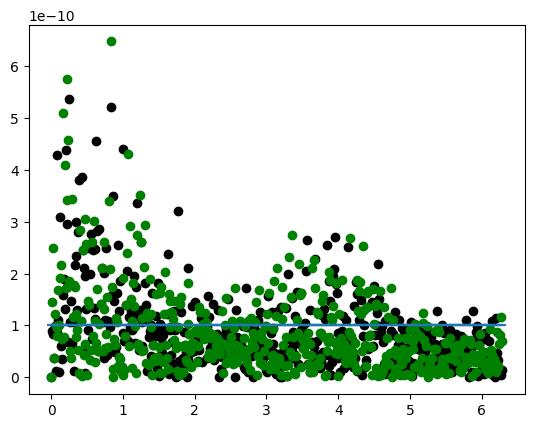

In [65]:
plt.scatter(interval, np.abs(sum_simpson), label="simpson", c='k')
plt.scatter(interval, np.abs(sum_trapezoid), label="trapezoid", c='g')
plt.scatter(interval, epsilon, marker='_')
plt.show()